In [ ]:
#Group Members: Naima Khan (22897), Nabiha Tariq (22592), Javeria Ishaque (22607), Sameen Amna(22317), Suha Ahmed (22602)

In [8]:
pip install scikit-learn numpy pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [9]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import joblib  # for saving models



In [16]:
# Load the Breast Cancer dataset
breast_cancer_data = load_breast_cancer()

#Exploring data
print(breast_cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

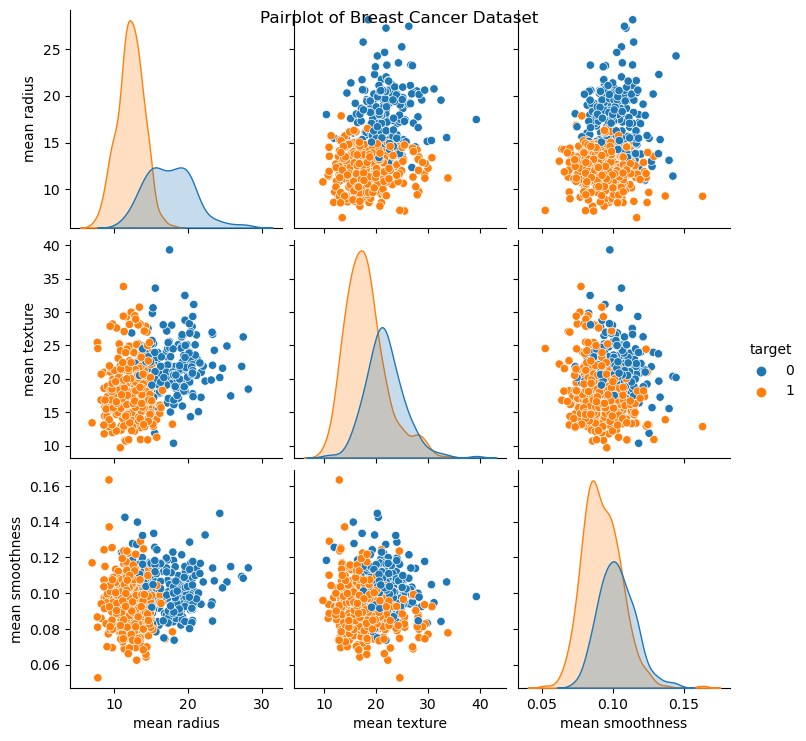

In [15]:
data = pd.DataFrame(data=breast_cancer_data.data, columns=breast_cancer_data.feature_names)
data['target'] = breast_cancer_data.target

sns.pairplot(data, hue='target', vars=['mean radius', 'mean texture', 'mean smoothness'])
plt.suptitle("Pairplot of Breast Cancer Dataset")
plt.show()

In [64]:
X = data


In [65]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('pca', PCA(n_components=2))  # PCA with 2 components
])

# Data fitting and transformation using the pipeline
X_new = pipeline.fit_transform(X)

In [66]:

# Encode target labels (Malignant: 0, Benign: 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(breast_cancer_data.target)


# Split data into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_new, y, test_size=0.2, random_state=42
)

# Define models and hyperparameters
models = {
    'Logistic Regression': (LogisticRegression(), {'model__C': [0.001, 0.01, 0.1, 1, 10]}),
    'Perceptron': (Perceptron(), {'model__alpha': [0.0001, 0.001, 0.01, 0.1]}),
    'Linear SVM': (SVC(kernel='linear'), {'model__C': [0.1, 1, 10]}),
    'Nonlinear SVM': (SVC(kernel='rbf'), {'model__C': [0.001, 0.01, 0.1, 1]})
}


    

In [67]:
from sklearn.model_selection import GridSearchCV
for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline([
        ('model', model)
    ])

    # GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train_bc, y_train_bc)

    best_estimator = grid_search.best_estimator_
    y_pred_bc = best_estimator.predict(X_test_bc)

    # Metrics for each model
    print("----------------------------")
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Best Mean Accuracy: {grid_search.best_score_}")
    classification_rep = classification_report(y_test_bc, y_pred_bc)
    print(f"Classification Report:\n{classification_rep}")

    # Save the best model using joblib
    joblib.dump(best_estimator, f"{model_name}_breast_cancer_model.pkl")

    print("------------------------------------")

----------------------------
Model: Logistic Regression
Best Hyperparameters: {'model__C': 1}
Best Mean Accuracy: 0.9670329670329669
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

------------------------------------
----------------------------
Model: Perceptron
Best Hyperparameters: {'model__alpha': 0.0001}
Best Mean Accuracy: 0.9648351648351647
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       11

In [68]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


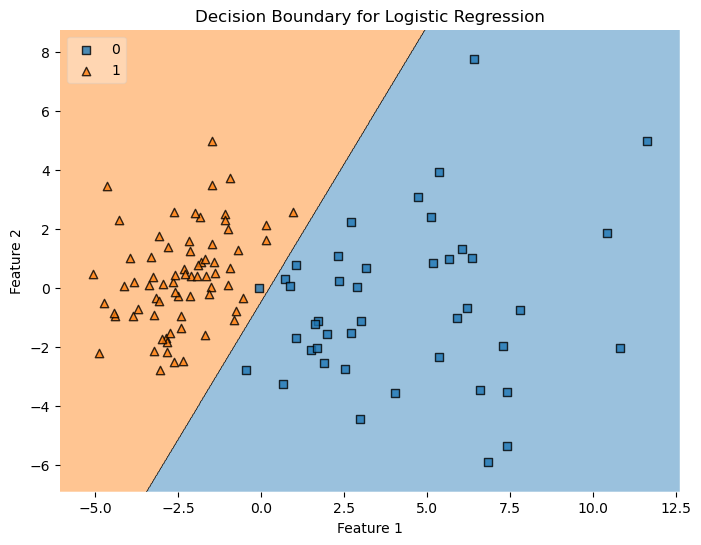

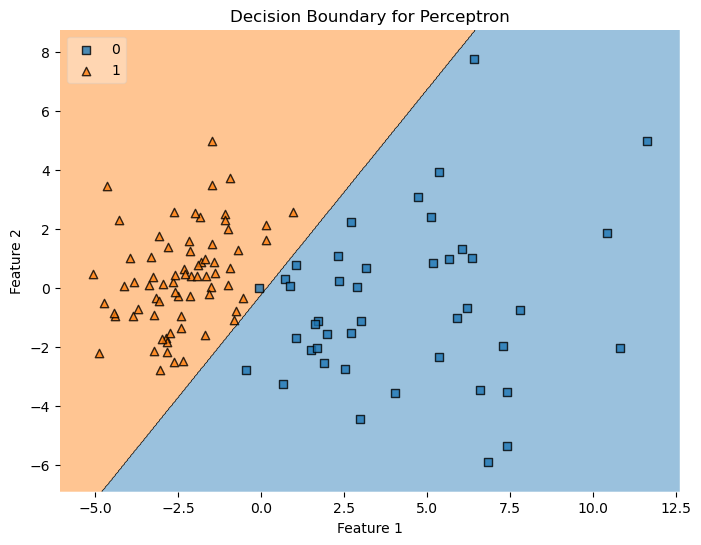

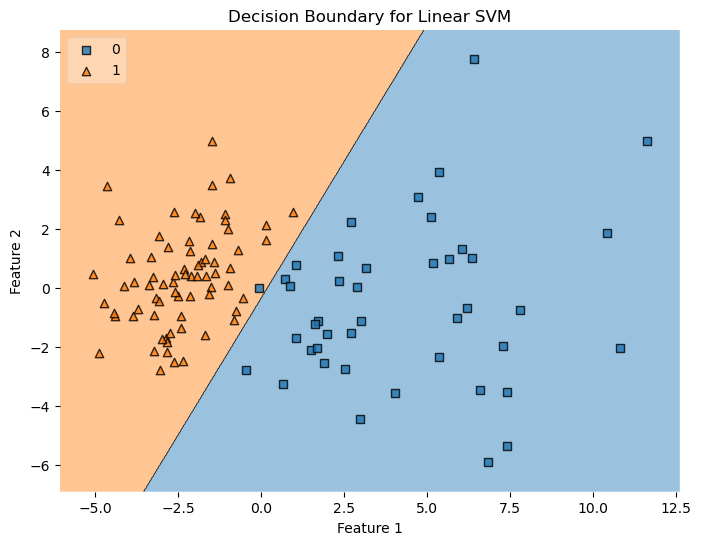

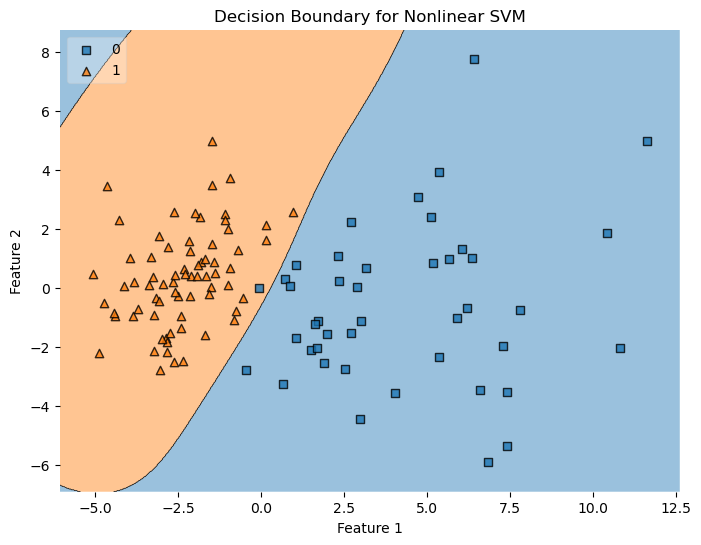

In [71]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
for model_name, (clf, hyperparameters) in models.items():
    clf.fit(X_train_bc, y_train_bc)
    
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X_test_bc, y_test_bc, clf=clf, legend=2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary for {model_name}')
    plt.show()